# WeatherPy

---


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [30]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | isafjordur
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | suizhou
Processing Record 7 of Set 1 | broken hill
Processing Record 8 of Set 1 | opuwo
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | aqadyr
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | khandyga
Processing Record 13 of Set 1 | saskatoon
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | revda
Processing Record 16 of Set 1 | kavaratti
Processing Record 17 of Set 1 | udachny
Processing Record 18 of Set 1 | mount isa
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | feijo
Processing R

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [23]:
### TEST CELL
url = "http://api.openweathermap.org/data/2.5/weather?"

city = 'faya'

city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"

city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': 42.4509, 'lat': 18.3851},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 13.29,
  'feels_like': 12.24,
  'temp_min': 13.29,
  'temp_max': 15.06,
  'pressure': 1014,
  'humidity': 60,
  'sea_level': 1014,
  'grnd_level': 797},
 'visibility': 10000,
 'wind': {'speed': 1.52, 'deg': 247, 'gust': 1.58},
 'clouds': {'all': 0},
 'dt': 1714870508,
 'sys': {'type': 1,
  'id': 7396,
  'country': 'SA',
  'sunrise': 1714876848,
  'sunset': 1714923173},
 'timezone': 10800,
 'id': 110690,
 'name': 'Faya',
 'cod': 200}

In [29]:
#### TEST CELL
city_lat = city_weather['coord']['lat']
city_lng = city_weather['coord']['lon']
city_max_temp = city_weather['main']['temp_max']
city_humidity = city_weather['main']['humidity']
city_clouds = city_weather['clouds']['all']
city_wind = city_weather['wind']['speed']
city_country = city_weather['sys']['country']
city_date = city_weather['dt']
print(city_lat)
print(city_lng)
print(city_max_temp)
print(city_humidity)
print(city_clouds)
print(city_wind)
print(city_country)
print(city_date)

18.3851
42.4509
15.06
60
0
1.52
SA
1714870508


In [31]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [32]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,12.65,78,0,4.12,US,1714871297
1,port-aux-francais,-49.3500,70.2167,3.47,61,100,8.53,TF,1714871347
2,isafjordur,66.0755,-23.1240,2.20,76,55,2.26,IS,1714871347
3,margaret river,-33.9500,115.0667,16.85,73,0,4.50,AU,1714871347
4,longyearbyen,78.2186,15.6401,-5.09,74,75,2.06,SJ,1714871347


In [35]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [36]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,12.65,78,0,4.12,US,1714871297
1,port-aux-francais,-49.3500,70.2167,3.47,61,100,8.53,TF,1714871347
2,isafjordur,66.0755,-23.1240,2.20,76,55,2.26,IS,1714871347
3,margaret river,-33.9500,115.0667,16.85,73,0,4.50,AU,1714871347
4,longyearbyen,78.2186,15.6401,-5.09,74,75,2.06,SJ,1714871347


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

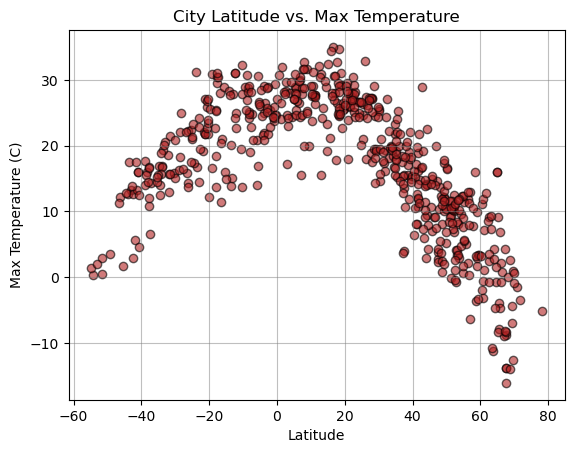

In [50]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']

plt.scatter(x_axis, y_axis, alpha=0.6, color='firebrick', edgecolor='black')

# Incorporate the other graph properties
plt.grid(color='grey', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

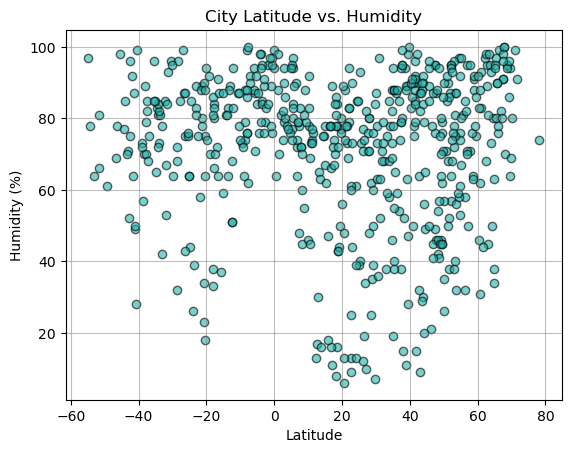

In [51]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']

plt.scatter(x_axis, y_axis, alpha=0.6, color='lightseagreen', edgecolor='black')

# Incorporate the other graph properties
plt.grid(color='grey', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

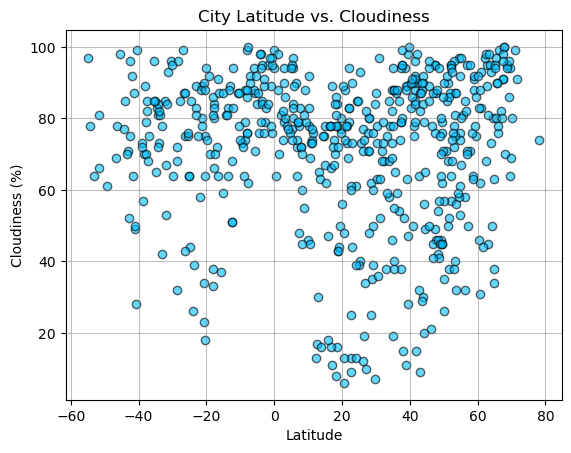

In [53]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']

plt.scatter(x_axis, y_axis, alpha=0.6, color='deepskyblue', edgecolor='black')

# Incorporate the other graph properties
plt.grid(color='grey', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

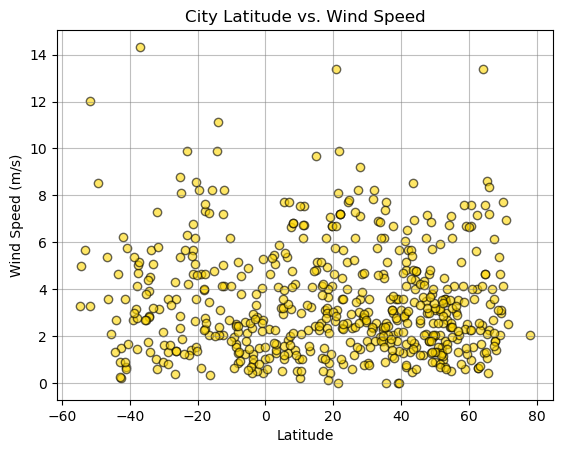

In [54]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

plt.scatter(x_axis, y_axis, alpha=0.6, color='gold', edgecolor='black')

# Incorporate the other graph properties
plt.grid(color='grey', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [72]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, y_label, eq_xy):

    #linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-value is: {rvalue**2}")
    
    #plot linear regression
    plt.scatter(x_values, y_values, alpha=0.6, color='blueviolet', edgecolor='black')
    plt.plot(x_values, regress_values, color='red')
    plt.annotate(line_eq, eq_xy, fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [73]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,12.65,78,0,4.12,US,1714871297
2,isafjordur,66.0755,-23.1240,2.20,76,55,2.26,IS,1714871347
4,longyearbyen,78.2186,15.6401,-5.09,74,75,2.06,SJ,1714871347
5,suizhou,31.7111,113.3631,17.31,71,100,2.36,CN,1714871347
9,aqadyr,48.2553,72.8483,12.36,54,100,4.66,KZ,1714871348


In [74]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,3.47,61,100,8.53,TF,1714871347
3,margaret river,-33.9500,115.0667,16.85,73,0,4.50,AU,1714871347
6,broken hill,-31.9500,141.4333,15.69,67,26,7.31,AU,1714871347
7,opuwo,-18.0607,13.8400,18.48,38,0,3.98,NaN,1714871348
8,invercargill,-46.4000,168.3500,12.23,78,65,3.58,NZ,1714871125


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7665738357327716


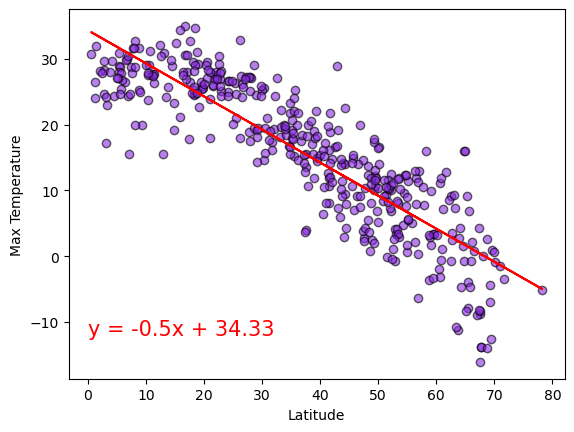

In [104]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],"Max Temperature", (0,-12))

The r-value is: 0.5706525256916738


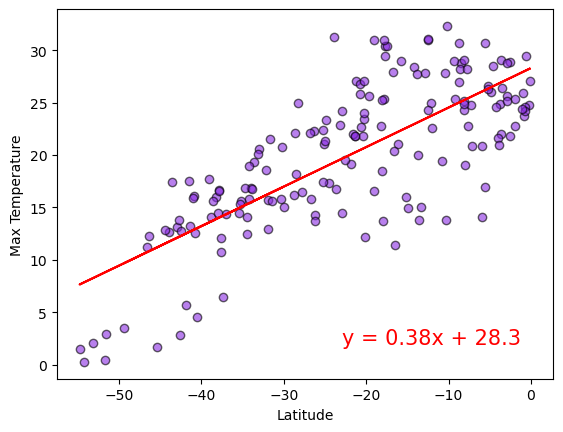

In [103]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],"Max Temperature", (-23,2))

**Discussion about the linear relationship:** The scatter plots show that there may be a linear relationship between a cities latitude and the max temperature. According to the r-values, the northern hemisphere shows a stronger linear relationship than the southern hemisphere. It can be generally said that latitudes closer to the equator are more likely to have higher max temperatures than those farther from the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.02156373991571034


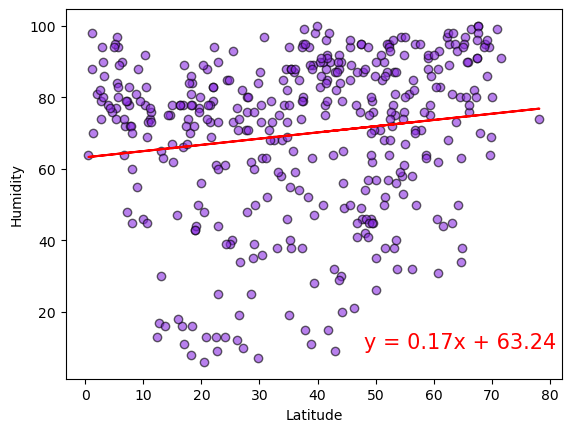

In [84]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],"Humidity", (48,10))

The r-value is: 0.04566497401757563


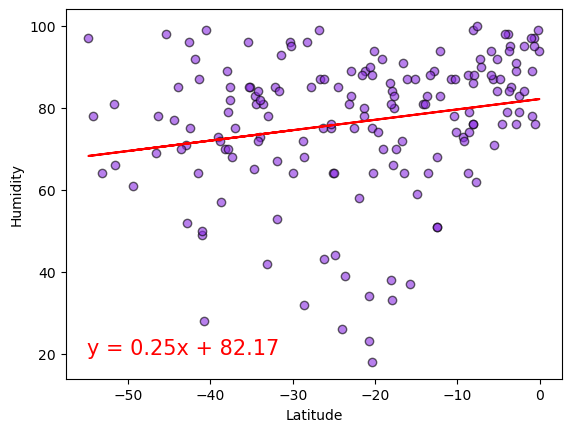

In [86]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],"Humidity", (-55,20))

**Discussion about the linear relationship:** The scatter plots do not show a strong linear relationship between latitude and humidity. This is also supported by a low r-value, suggesting that there is not a linear relationship between the two variables. It appears that most of the cities have humidity above 60% without any notable relationship to the latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.01923098823476198


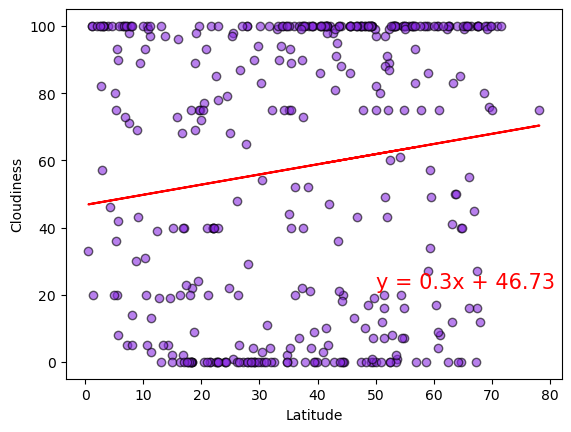

In [98]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],"Cloudiness", (50,22))

The r-value is: 0.049502368388672


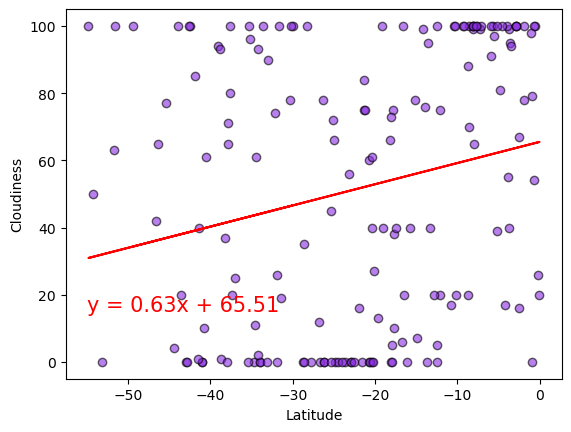

In [91]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],"Cloudiness", (-55,15))

**Discussion about the linear relationship:** The scatterplots do not show much of a linear relationship between cloudiness and latitude. The low r-values support this conclusion. Overall, the most cities tend to have 0% or 100% cloudiness with no correlation to latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.002109566444614491


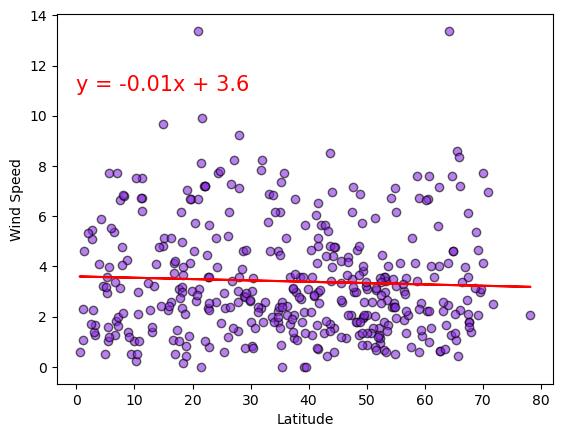

In [94]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],"Wind Speed", (0,11))

The r-value is: 0.030303184501025423


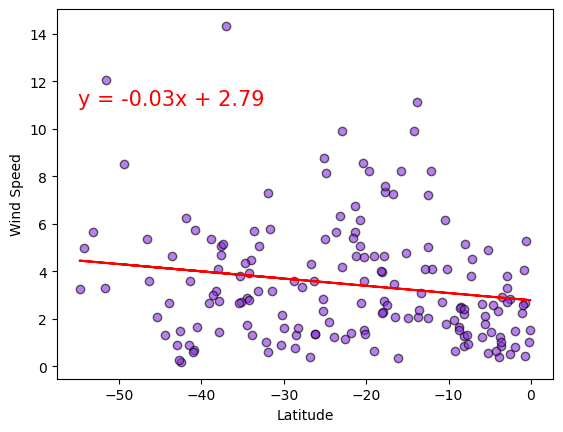

In [95]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],"Wind Speed", (-55,11))

**Discussion about the linear relationship:** The scatter plots and low r-values show that there is not a linear relationship between winds speeds and latitude. The majority of the cities appear to have wind speeds up to 6 m/s in the southern hemisphere and up to 8 m/s in the northern hemisphere. 